# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
# before preprocessing, the data should be split into training and test sets. 

from sklearn.utils import shuffle
project_data = shuffle(project_data, random_state=42)
project_data = project_data[0:50000]

# selecting only few instances
from sklearn.model_selection import train_test_split
# project_data_train,project_data_val = train_test_split(project_data, test_size=0.20, random_state=42)
project_data,project_data_test = train_test_split(project_data,test_size=0.30, random_state=42)

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (35000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
42452       66055  p022779  c1630a7b12ab93171794941d4af09751           Mrs.   
70256       46586  p091452  8086fe2a84e210db8ff2faeebff4ce34            Ms.   

      school_state project_submitted_datetime project_grade_category  \
42452           OR        2016-12-02 11:21:16          Grades PreK-2   
70256           AZ        2016-09-01 11:02:45          Grades PreK-2   

                                           project_title  \
42452                   Hokki Stools Help Concentration!   
70256  Math Is Awesome With A Little Reading And Rela...   

                                         project_essay_1  \
42452  My students are full of energy and eager to le...   
70256  I teach First grade to students who love and w...   

                                         project_essay_2 project_essay_3  \
42452  I am asking donors for funds to purchase a set...             NaN   
70256  Students will have hands on manipulatives to p...             NaN   

      project_essay_4                           project_resource_summary  \
42452             NaN  My students need Hokki Stools at the teacher t...   
70256             NaN  My students need beanbags so they can collabor...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
42452                                             0                    1   
70256                                             1                    1   

        clean_categories clean_subcategories  \
42452  Literacy_Language            Literacy   
70256  Literacy_Language            Literacy   

                                                   essay  
42452  My students are full of energy and eager to le...  
70256  I teach First grade to students who love and w...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[15])
print("="*50)

My students are full of energy and eager to learn!  They are a diverse and dynamic group who needs all the support I can give them.  Since Hoover Elementary School is Title 1 and classified as \"highest poverty,\" there are many opportunities that are lacking.  On a daily basis, I work with small groups of students at my teacher table, and I have noticed that they have difficulty sitting still and participating in the guided lesson.  When I did a little research, I found that students fidget more when they are asked to perform complex tasks.  One solution is to provide seats that allow students to fidget while maintaining their focus on the task.  \r\n\r\nIn my student teaching, my cooperating teacher had a set of Hokki Stools for his class.   He noticed a dramatic increase in his students' focus and concentration when they used the stools.  So I decided to ask for help from generous donors to allow me to purchase 6 of the stools for my class.I am asking donors for funds to purchase a 

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20])
print(sent)
print("="*50)

My Students: If you step inside my classroom, you will see that my students participate in an environment that is very different from the typical classroom. The vast array of activities include social skills activities, as well as computer-based learning and other creative instruction. We also have a behavior management system requiring many items. My students have special needs such as Attention Deficit Disorders which require specific environmental surroundings. \r\nI teach 1st through 3rd graders at the elementary school level. Many of these students come from difficult environments and are never taught how to develop good work habits as well as social skills. Many students I teach have Autism as well as Attention Deficit Hyperactivity Disorder. The students in my school are between 70 and 80% low income, and many of the students in my class are very poor. They have many \"strikes against them,\" so that is why I feel it is important to nurture them both in the areas of the reading/

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My Students: If you step inside my classroom, you will see that my students participate in an environment that is very different from the typical classroom. The vast array of activities include social skills activities, as well as computer-based learning and other creative instruction. We also have a behavior management system requiring many items. My students have special needs such as Attention Deficit Disorders which require specific environmental surroundings.   I teach 1st through 3rd graders at the elementary school level. Many of these students come from difficult environments and are never taught how to develop good work habits as well as social skills. Many students I teach have Autism as well as Attention Deficit Hyperactivity Disorder. The students in my school are between 70 and 80% low income, and many of the students in my class are very poor. They have many  strikes against them,  so that is why I feel it is important to nurture them both in the areas of the reading/math

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My Students If you step inside my classroom you will see that my students participate in an environment that is very different from the typical classroom The vast array of activities include social skills activities as well as computer based learning and other creative instruction We also have a behavior management system requiring many items My students have special needs such as Attention Deficit Disorders which require specific environmental surroundings I teach 1st through 3rd graders at the elementary school level Many of these students come from difficult environments and are never taught how to develop good work habits as well as social skills Many students I teach have Autism as well as Attention Deficit Hyperactivity Disorder The students in my school are between 70 and 80 low income and many of the students in my class are very poor They have many strikes against them so that is why I feel it is important to nurture them both in the areas of the reading math areas as well as 

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","nannan"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:19<00:00, 1822.06it/s]


In [18]:
# after preprocesing
preprocessed_essays[20]

'my students if step inside classroom see students participate environment different typical classroom the vast array activities include social skills activities well computer based learning creative instruction we also behavior management system requiring many items my students special needs attention deficit disorders require specific environmental surroundings i teach 1st 3rd graders elementary school level many students come difficult environments never taught develop good work habits well social skills many students i teach autism well attention deficit hyperactivity disorder the students school 70 80 low income many students class poor they many strikes i feel important nurture areas reading math areas well social emotional areas the room dividers used separate desks place desks closer together save space these dividers made calming colors hopefully allow students calm working ipads work tasks my students often need quiet calm lives outside world not calm environment the mats use

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also


from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:00<00:00, 36556.29it/s]


## 1.5 Preparing data for models

In [20]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [21]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_cat.fit_transform(project_data['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Literacy_Language', 'History_Civics', 'AppliedLearning', 'Warmth', 'Music_Arts', 'Math_Science', 'Health_Sports', 'Care_Hunger', 'SpecialNeeds']
Shape of matrix after one hot encodig  (35000, 9)


In [22]:
# we use count vectorizer to convert the values into one 
vectorizer_subcat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_subcat.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer_subcat.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['ParentInvolvement', 'TeamSports', 'AppliedSciences', 'Civics_Government', 'ForeignLanguages', 'Extracurricular', 'Economics', 'CommunityService', 'Health_Wellness', 'CharacterEducation', 'College_CareerPrep', 'Care_Hunger', 'VisualArts', 'Music', 'Mathematics', 'Warmth', 'Literature_Writing', 'Health_LifeScience', 'Literacy', 'EarlyDevelopment', 'Gym_Fitness', 'History_Geography', 'PerformingArts', 'SocialSciences', 'Other', 'SpecialNeeds', 'NutritionEducation', 'FinancialLiteracy', 'ESL', 'EnvironmentalScience']
Shape of matrix after one hot encodig  (35000, 30)


In [23]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

# for school_state


from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

vectorizer_sc_state = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
school_state_one_hot = vectorizer_sc_state.fit_transform(project_data['school_state'].values)
print(vectorizer_sc_state.get_feature_names())
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['NJ', 'PA', 'NC', 'MI', 'ID', 'HI', 'VT', 'NM', 'TN', 'KY', 'TX', 'CA', 'AK', 'UT', 'MT', 'IL', 'AL', 'WV', 'NH', 'SC', 'DC', 'OR', 'GA', 'LA', 'MO', 'MD', 'NY', 'IN', 'NE', 'FL', 'AZ', 'ME', 'WI', 'OH', 'SD', 'IA', 'MN', 'WY', 'CT', 'NV', 'RI', 'OK', 'MA', 'ND', 'CO', 'WA', 'AR', 'KS', 'VA', 'DE', 'MS']
Shape of matrix after one hot encodig  (35000, 51)


In [24]:
# for teacher_prefix
project_data["teacher_prefix"] = project_data["teacher_prefix"].fillna('Mrs.')


from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer_prefix = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
teacher_prefix_one_hot = vectorizer_prefix.fit_transform(project_data['teacher_prefix'].values)
print(vectorizer_prefix.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Mr.', 'Dr.', 'Teacher', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (35000, 5)


In [25]:
# for project_grade_category

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    word = word.replace('Grades', ' ')
    my_counter.update(word.split())
    
    

project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))



vectorizer_grade_cat = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer_grade_cat.fit_transform(project_data['project_grade_category'].values)
print(vectorizer_grade_cat.get_feature_names())

project_grade_one_hot = vectorizer_grade_cat.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_one_hot.shape)

['6-8', 'PreK-2', '3-5', '9-12']
Shape of matrix after one hot encodig  (35000, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [26]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_text = CountVectorizer(min_df=10)
text_bow = vectorizer_bow_text.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (35000, 10638)


In [27]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

# https://stackoverflow.com/a/47091490/4084039

#title is already preprocessed in one of the above cells
# titles could not be very common words, which are dependent on the project proposal. We choose atleast 5 documents here

vectorizer_bow_titles = CountVectorizer(min_df=5)
titles_bow = vectorizer_bow_titles.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encoding", titles_bow.shape )


Shape of matrix after one hot encoding (35000, 2608)


#### 1.5.2.2 TFIDF vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_text = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer_tfidf_text.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

vectorizer_tfidf_title = TfidfVectorizer(min_df=5)
title_tfidf = vectorizer_tfidf_title.fit_transform(preprocessed_titles)
print("Schape of matrix after one hot encoding ",title_tfidf.shape)

Shape of matrix after one hot encodig  (35000, 10638)
Schape of matrix after one hot encoding  (35000, 2608)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [29]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [30]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [31]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:10<00:00, 3409.54it/s]


35000
300


In [32]:
# average Word2Vec
# compute average word2vec for each title.
avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles.append(vector)

print(len(avg_w2v_titles))
print(len(avg_w2v_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:00<00:00, 60542.81it/s]


35000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [33]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [01:27<00:00, 402.20it/s]


35000
300


In [35]:
# Similarly you can vectorize for title also
# vectorizing titles

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))


100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:01<00:00, 27282.58it/s]


35000
300


### 1.5.3 Vectorizing Numerical features

In [36]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [37]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data_train['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

# for number of previously submitted projects

previous_projects_scalar = StandardScaler()
previous_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previous_projects_standardized = previous_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [38]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(35000, 9)
(35000, 30)
(35000, 10638)
(35000, 1)


In [39]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)


In [40]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [41]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

C:\Program Files\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



pos: 0.245, neg: 0.01, neu: 0.745, compound: 0.9975, 

# Decision Trees

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

X = hstack((previous_projects_standardized, teacher_prefix_one_hot,school_state_one_hot,
            project_grade_one_hot, categories_one_hot,sub_categories_one_hot, titles_bow,text_bow,price_standardized))
train_data = X.todense()

# deleting X to save some space

del X,titles_bow,text_bow

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [43]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# performing bow and one hot encoding for the features on test set

# project_subject_categories of test set

catogories = list(project_data_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list_test = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list_test.append(temp.strip())
    
project_data_test['clean_categories'] = cat_list_test
project_data_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data_test['clean_categories'].values:
    my_counter.update(word.split())


categories_test_one_hot = vectorizer_cat.transform(project_data_test['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_test_one_hot.shape)

['Literacy_Language', 'History_Civics', 'AppliedLearning', 'Warmth', 'Music_Arts', 'Math_Science', 'Health_Sports', 'Care_Hunger', 'SpecialNeeds']
Shape of matrix after one hot encodig  (15000, 9)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [44]:
# preprocessing sub_categories of test set
sub_catogories = list(project_data_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list_test = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list_test.append(temp.strip())

project_data_test['clean_subcategories'] = sub_cat_list_test
project_data_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data_test['clean_subcategories'].values:
    my_counter.update(word.split())
    
# we use count vectorizer to convert the values into one 
sub_categories_test_one_hot = vectorizer_subcat.transform(project_data_test['clean_subcategories'].values)

print("Shape of matrix after one hot encodig ",sub_categories_test_one_hot.shape)

Shape of matrix after one hot encodig  (15000, 30)


In [45]:
#vectorizer_sc_state = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
school_state_test_one_hot = vectorizer_sc_state.transform(project_data_test['school_state'].values)
print(vectorizer_sc_state.get_feature_names())
print("Shape of matrix after one hot encodig ",school_state_test_one_hot.shape)

['NJ', 'PA', 'NC', 'MI', 'ID', 'HI', 'VT', 'NM', 'TN', 'KY', 'TX', 'CA', 'AK', 'UT', 'MT', 'IL', 'AL', 'WV', 'NH', 'SC', 'DC', 'OR', 'GA', 'LA', 'MO', 'MD', 'NY', 'IN', 'NE', 'FL', 'AZ', 'ME', 'WI', 'OH', 'SD', 'IA', 'MN', 'WY', 'CT', 'NV', 'RI', 'OK', 'MA', 'ND', 'CO', 'WA', 'AR', 'KS', 'VA', 'DE', 'MS']
Shape of matrix after one hot encodig  (15000, 51)


In [46]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

In [47]:
price_scalar = StandardScaler()
price_scalar.fit(project_data_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_test = price_scalar.transform(project_data_test['price'].values.reshape(-1, 1))

# for number of previously submitted projects

previous_projects_scalar = StandardScaler()
previous_projects_scalar.fit(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previous_projects_standardized_test = previous_projects_scalar.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [48]:
# teacher prefix for test data
project_data_test["teacher_prefix"] = project_data_test["teacher_prefix"].fillna('Mrs.')
teacher_prefix_one_hot_test= vectorizer_prefix.transform(project_data_test['teacher_prefix'].values)
print(vectorizer_prefix.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

# project_grade for test data

project_grade_one_hot_test = vectorizer_grade_cat.transform(project_data_test['project_grade_category'].values)

['Mr.', 'Dr.', 'Teacher', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (15000, 5)


In [49]:
project_data_test["essay"] = project_data_test["project_essay_1"].map(str) +\
                        project_data_test["project_essay_2"].map(str) + \
                        project_data_test["project_essay_3"].map(str) + \
                        project_data_test["project_essay_4"].map(str)

In [50]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())
    
    
# similarly you can preprocess the titles also


from tqdm import tqdm
preprocessed_titles_test = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_test.append(sent.lower().strip())
    

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 40001.35it/s]


In [51]:
# vectorizing bag of words for essasys and titles of test set
text_bow_test = vectorizer_bow_text.transform(preprocessed_essays_test)
titles_bow_test = vectorizer_bow_titles.transform(preprocessed_titles_test)

In [52]:
#X = hstack((price_standardized, previous_projects_standardized, teacher_prefix_one_hot,school_state_one_hot,
 #           project_grade_one_hot, categories_one_hot,sub_categories_one_hot, titles_bow,text_bow))
X_test = hstack((previous_projects_standardized_test, teacher_prefix_one_hot_test,school_state_test_one_hot,
                project_grade_one_hot_test, categories_test_one_hot,sub_categories_test_one_hot,titles_bow_test,
                text_bow_test,price_standardized_test))

test_data_bow = X_test.todense()

del X_test,titles_bow_test,text_bow_test


In [53]:
# form the corresponding class labels
train_class_labels = project_data['project_is_approved']

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# training and validation
# https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/

# https://medium.com/@mandava807/cross-validation-and-hyperparameter-tuning-in-python-65cfb80ee485
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

depth_vals = [1, 5, 10, 50, 100, 500, 1000]
min_samples_vals = [5, 10, 100, 500]

hyperparams = dict(max_depth=depth_vals, min_samples_split=min_samples_vals)

#Using randomsearchCV
model_bow = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=hyperparams, scoring = 'roc_auc', cv=4)
model_bow.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model_bow.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'param_min_samples_split',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [55]:
model_cv_results = model_cv_results.sort_values('mean_test_score',ascending=False)
[model_rows,model_cols] = model_cv_results.shape
x_axis = [i for i in range(model_rows)]

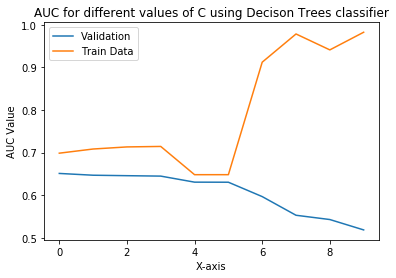

In [56]:
#sns.FacetGrid(k_auc,height=5).map(plt.scatter,0,1).add_legend()
# plt.title("AUC values for different values of k")
# plt.show()

# https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

# line 1 points 

# plotting the line 1 points  
plt.plot(x_axis, model_cv_results['mean_test_score'], label = "Validation") 
  

# plotting the line 2 points  
plt.plot(x_axis, model_cv_results['mean_train_score'], label = "Train Data") 
  
# naming the x axis 
plt.xlabel('X-axis') 
# naming the y axis 
plt.ylabel('AUC Value') 
# giving a title to my graph 
plt.title('AUC for different values of C using Decison Trees classifier') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 


In [57]:
best_depth_bow = model_cv_results.iloc[0]['param_max_depth']
best_split_bow = model_cv_results.iloc[0]['param_min_samples_split']

In [58]:
dt_best_model_bow = DecisionTreeClassifier(max_depth=best_depth_bow,min_samples_split=best_split_bow, class_weight='balanced')
dt_best_model_bow.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = dt_best_model_bow.predict_proba(test_data_bow)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = dt_best_model_bow.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_bow = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for BOW') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

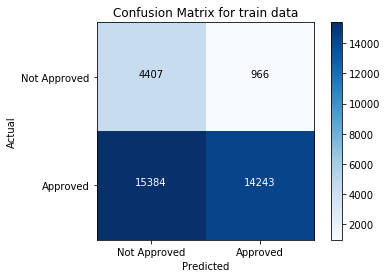

In [59]:
pred_labels_train = dt_best_model_bow.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

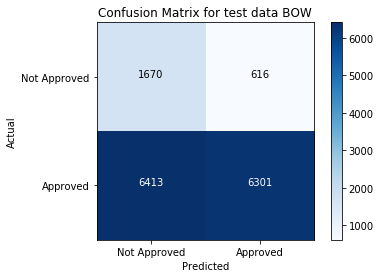

In [60]:
pred_labels_test = dt_best_model_bow.predict(test_data_bow)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data BOW')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [61]:
# appending the feature names in the same order as in train data
# hstack((previous_projects_standardized_test, teacher_prefix_one_hot_test,school_state_test_one_hot,
#                 project_grade_one_hot_test, categories_test_one_hot,sub_categories_test_one_hot,titles_bow_test,
#                 text_bow_test,price_standardized_test))

prev_projects_col = pd.DataFrame(["prev_projects_col"])
price_col = pd.DataFrame(["price_col"])
col_prefix = pd.DataFrame(vectorizer_prefix.get_feature_names())
col_school = pd.DataFrame(vectorizer_sc_state.get_feature_names())
col_proj_grade = pd.DataFrame(vectorizer_grade_cat.get_feature_names())
col_cat = pd.DataFrame(vectorizer_cat.get_feature_names())
col_subcat = pd.DataFrame(vectorizer_subcat.get_feature_names())
col_titles = pd.DataFrame(vectorizer_bow_titles.get_feature_names())
col_text = pd.DataFrame(vectorizer_bow_text.get_feature_names())
frames = [prev_projects_col,col_prefix,col_school,col_proj_grade,col_cat,col_subcat,col_titles,col_text,price_col]
feature_name_result = pd.concat(frames)
feature_name_result = feature_name_result.values.tolist()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [62]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [1]:
# https://scikit-learn.org/stable/modules/tree.html

# from sklearn import tree
# # import pydotplus
# import graphviz
# dot_data = tree.export_graphviz(dt_best_model_bow, out_file=None,
#                                feature_names = feature_name_result,filled=True,
#                                rounded=True, max_depth =2)

# graph = graphviz.Source(dot_data)
# graph



In [94]:
# https://graphviz.readthedocs.io/en/stable/manual.html
from graphviz import render
graph.render('test-output/round-table_bow.gv', view=True) 

'test-output/round-table_bow.gv.pdf'

In [70]:
# plotting wordcloud

# finding false positive indexes
pred_indexes_positive = np.where(pred_labels_test==1)
actual_indexes_positive = np.where(actual_labels_test==0)
false_positive_indexes = (np.intersect1d(pred_indexes_positive,actual_indexes_positive))

preprocessed_essays_test_DF = pd.DataFrame(preprocessed_essays_test)
false_positive_essays = preprocessed_essays_test_DF.iloc[false_positive_indexes]


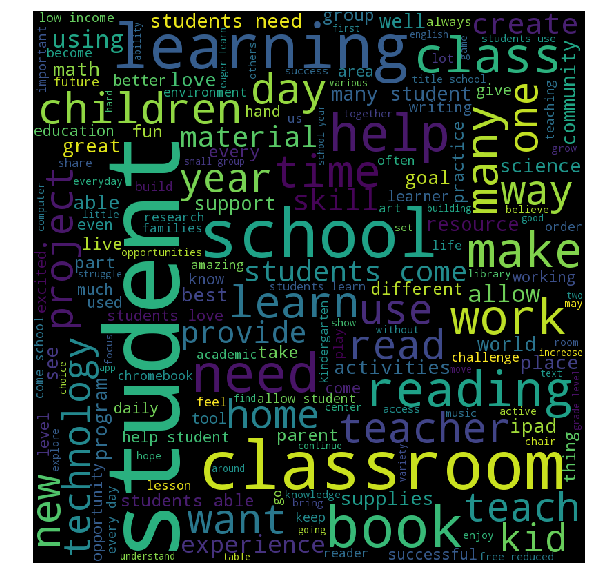

In [71]:
# importing all necessery modules 

# https://www.geeksforgeeks.org/generating-word-cloud-python/
    
    
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
# iterate through the csv file 
for i in range(len(false_positive_essays)): 
      
    # typecaste each val to string 
    val = false_positive_essays.iloc[i][0]
    val = str(val)
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

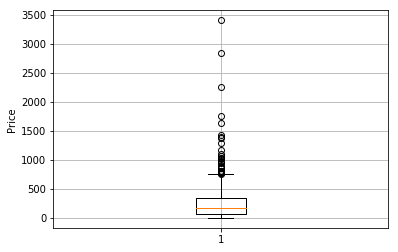

In [72]:
# Plot the box plot with the price of these false positive data points

price_false_positive = project_data_test.iloc[false_positive_indexes]['price']

plt.boxplot([price_false_positive])
plt.ylabel('Price')
plt.grid()
plt.show()

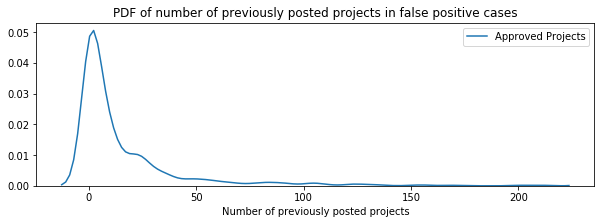

In [73]:
# Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points
plt.figure(figsize=(10,3))
sns.distplot(project_data_test.iloc[false_positive_indexes]['teacher_number_of_previously_posted_projects'], 
             hist=False, label="Approved Projects")
plt.title('PDF of number of previously posted projects in false positive cases')
plt.xlabel('Number of previously posted projects')
plt.show()

In [72]:
del dt_best_model_bow,train_data,test_data_bow

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [74]:
# Please write all the code with proper documentation


# tfidf for the test instances
text_tfidf_test = vectorizer_tfidf_text.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)


title_tfidf_test = vectorizer_tfidf_title.transform(preprocessed_titles_test)
print("Schape of matrix after one hot encoding ",title_tfidf.shape)

Shape of matrix after one hot encodig  (35000, 10638)
Schape of matrix after one hot encoding  (35000, 2608)


In [75]:
# concatenating the vectors to prepare train, test and validation sets

X = hstack((previous_projects_standardized, teacher_prefix_one_hot,school_state_one_hot,project_grade_one_hot,
                 categories_one_hot,sub_categories_one_hot,title_tfidf, text_tfidf,price_standardized))

train_data_tfidf = X.todense()


X = hstack((previous_projects_standardized_test, teacher_prefix_one_hot_test,school_state_test_one_hot,
            project_grade_one_hot_test, categories_test_one_hot,sub_categories_test_one_hot,
            title_tfidf_test, text_tfidf_test,price_standardized_test))
train_class_labels
test_data_tfidf = X.todense()

In [76]:

depth_vals = [1, 5, 10, 50, 100, 500, 1000]
min_samples_vals = [5, 10, 100, 500]

hyperparams = dict(max_depth=depth_vals, min_samples_split=min_samples_vals)

#Using randomsearchCV
model_tfidf = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=hyperparams, scoring = 'roc_auc', cv=4)
model_tfidf.fit(train_data_tfidf, train_class_labels)

model_cv_results = pd.DataFrame(model_tfidf.cv_results_)
model_cv_results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'param_min_samples_split',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [77]:
# sorting the results based on validation auc score

model_cv_results = model_cv_results.sort_values('mean_test_score',ascending=False)
[model_rows,model_cols] = model_cv_results.shape
x_axis = [i for i in range(model_rows)]

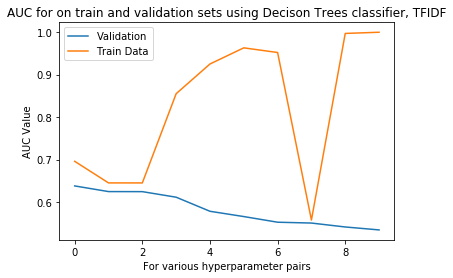

In [78]:

# plotting the line 1 points  
plt.plot(x_axis, model_cv_results['mean_test_score'], label = "Validation") 
  

# plotting the line 2 points  
plt.plot(x_axis, model_cv_results['mean_train_score'], label = "Train Data") 
  
# naming the x axis 
plt.xlabel('For various hyperparameter pairs') 
# naming the y axis 
plt.ylabel('AUC Value') 
# giving a title to my graph 
plt.title('AUC for on train and validation sets using Decison Trees classifier, TFIDF') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 


In [79]:
best_depth_tfidf = model_cv_results.iloc[0]['param_max_depth']
best_split_tfidf = model_cv_results.iloc[0]['param_min_samples_split']

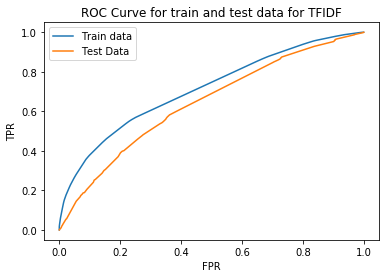

In [80]:
dt_best_model_tfidf = DecisionTreeClassifier(max_depth=best_depth_tfidf,min_samples_split=best_split_tfidf, 
                                             class_weight='balanced')
dt_best_model_tfidf.fit(train_data_tfidf,train_class_labels)
    
# predict labels of test data
pred_labels_test = dt_best_model_tfidf.predict_proba(test_data_tfidf)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = dt_best_model_tfidf.predict_proba(train_data_tfidf)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_tfidf = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for TFIDF') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

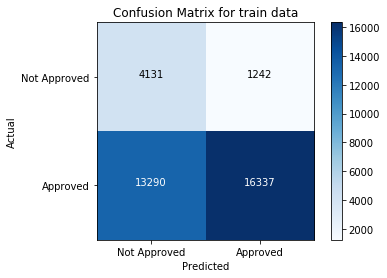

In [81]:
pred_labels_train = dt_best_model_tfidf.predict(train_data_tfidf)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

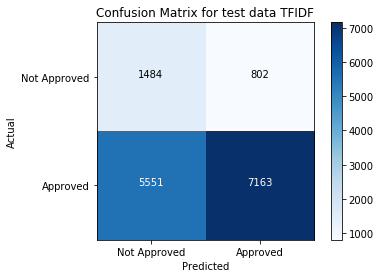

In [82]:
pred_labels_test = dt_best_model_tfidf.predict(test_data_tfidf)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data TFIDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [2]:
# dot_data = tree.export_graphviz(dt_best_model_tfidf, out_file=None,
#                                feature_names = feature_name_result,filled=True,
#                                rounded=True, max_depth =2)

# graph_tfidf = graphviz.Source(dot_data)
# graph_tfidf



In [93]:
# https://graphviz.readthedocs.io/en/stable/manual.html
from graphviz import render
graph_tfidf.render('test-output/round-table.gv', view=True) 

'test-output/round-table.gv.pdf'

In [84]:
pred_indexes_positive = np.where(pred_labels_test==1)
actual_indexes_positive = np.where(actual_labels_test==0)
false_positive_indexes = (np.intersect1d(pred_indexes_positive,actual_indexes_positive))

preprocessed_essays_test_DF = pd.DataFrame(preprocessed_essays_test)
false_positive_essays = preprocessed_essays_test_DF.iloc[false_positive_indexes]


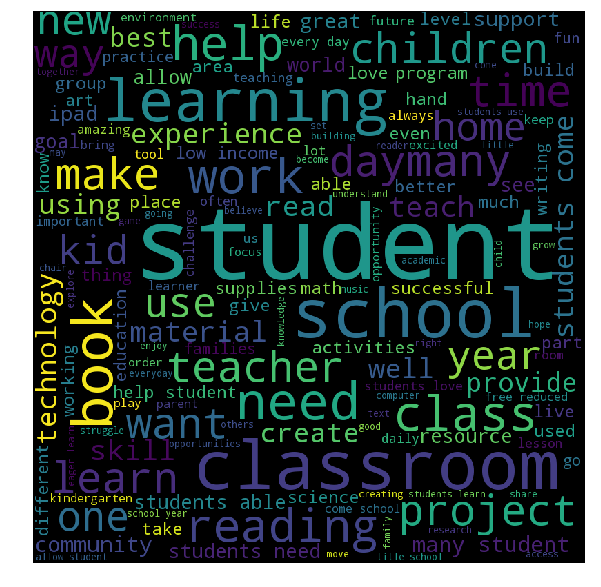

In [85]:

comment_words = ' '
# iterate through the csv file 
for i in range(len(false_positive_essays)): 
      
    # typecaste each val to string 
    val = false_positive_essays.iloc[i][0]
    val = str(val)
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

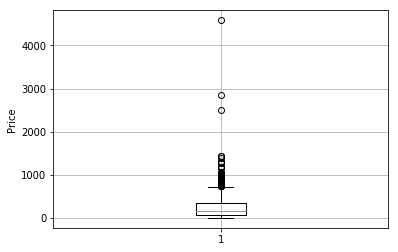

In [87]:
# Plot the box plot with the price of these false positive data points

price_false_positive = project_data_test.iloc[false_positive_indexes]['price']

plt.boxplot([price_false_positive])
plt.ylabel('Price')
plt.grid()
plt.show()

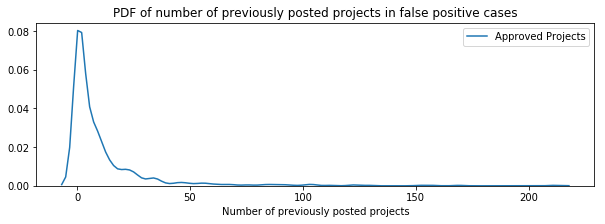

In [88]:
# Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points
plt.figure(figsize=(10,3))
sns.distplot(project_data_test.iloc[false_positive_indexes]['teacher_number_of_previously_posted_projects'], 
             hist=False, label="Approved Projects")
plt.title('PDF of number of previously posted projects in false positive cases')
plt.xlabel('Number of previously posted projects')
plt.show()

In [86]:
del dt_best_model_tfidf,train_data_tfidf,test_data_tfidf,model_tfidf

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [95]:
# avg w2v transformation for essays and titles for test set

avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))


# average Word2Vec
# compute average word2vec for each title.
avg_w2v_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_test.append(vector)

print(len(avg_w2v_titles_test))
print(len(avg_w2v_titles_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:04<00:00, 3395.22it/s]


15000
300


100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 55181.00it/s]


15000
300


In [96]:
# concatenating the vectors to prepare train, test and validation sets for avg w2v

X = hstack((previous_projects_standardized, teacher_prefix_one_hot,school_state_one_hot,project_grade_one_hot,
                 categories_one_hot,sub_categories_one_hot,avg_w2v_titles,avg_w2v_vectors, price_standardized))

train_data_avgw2v = X.todense()


X = hstack((previous_projects_standardized_test, teacher_prefix_one_hot_test,school_state_test_one_hot,
            project_grade_one_hot_test, categories_test_one_hot,sub_categories_test_one_hot, avg_w2v_titles_test,
            avg_w2v_vectors_test,price_standardized_test))

test_data_avgw2v = X.todense()

del X

In [97]:

depth_vals = [1, 5, 10, 50, 100, 500, 1000]
min_samples_vals = [5, 10, 100, 500]

hyperparams = dict(max_depth=depth_vals, min_samples_split=min_samples_vals)

#Using randomsearchCV
model_avgw2v = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=hyperparams, scoring = 'roc_auc', cv=4)
model_avgw2v.fit(train_data_avgw2v, train_class_labels)

model_cv_results = pd.DataFrame(model_avgw2v.cv_results_)
model_cv_results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'param_min_samples_split',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [98]:
# sorting the results based on validation auc score

model_cv_results = model_cv_results.sort_values('mean_test_score',ascending=False)
[model_rows,model_cols] = model_cv_results.shape
x_axis = [i for i in range(model_rows)]

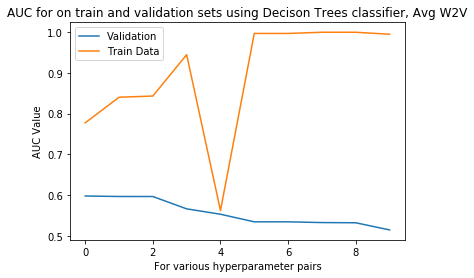

In [99]:

# plotting the line 1 points  
plt.plot(x_axis, model_cv_results['mean_test_score'], label = "Validation") 
  

# plotting the line 2 points  
plt.plot(x_axis, model_cv_results['mean_train_score'], label = "Train Data") 
  
# naming the x axis 
plt.xlabel('For various hyperparameter pairs') 
# naming the y axis 
plt.ylabel('AUC Value') 
# giving a title to my graph 
plt.title('AUC for on train and validation sets using Decison Trees classifier, Avg W2V') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 


In [100]:
best_depth_avgw2v = model_cv_results.iloc[0]['param_max_depth']
best_split_avgw2v = model_cv_results.iloc[0]['param_min_samples_split']

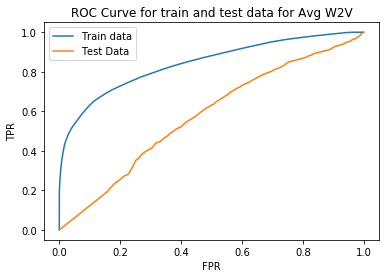

In [101]:
dt_best_model_avgw2v = DecisionTreeClassifier(max_depth=best_depth_avgw2v,min_samples_split=best_split_avgw2v, 
                                             class_weight='balanced')
dt_best_model_avgw2v.fit(train_data_avgw2v,train_class_labels)
    
# predict labels of test data
pred_labels_test = dt_best_model_avgw2v.predict_proba(test_data_avgw2v)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = dt_best_model_avgw2v.predict_proba(train_data_avgw2v)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_avgw2v = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for Avg W2V') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

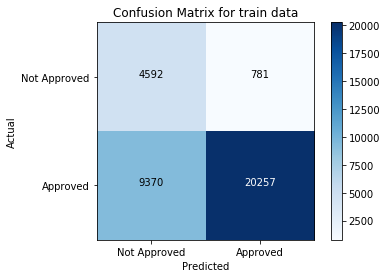

In [102]:
pred_labels_train = dt_best_model_avgw2v.predict(train_data_avgw2v)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

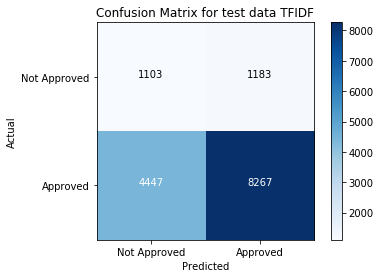

In [103]:
pred_labels_test = dt_best_model_avgw2v.predict(test_data_avgw2v)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data TFIDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [104]:
pred_indexes_positive = np.where(pred_labels_test==1)
actual_indexes_positive = np.where(actual_labels_test==0)
false_positive_indexes = (np.intersect1d(pred_indexes_positive,actual_indexes_positive))

preprocessed_essays_test_DF = pd.DataFrame(preprocessed_essays_test)
false_positive_essays = preprocessed_essays_test_DF.iloc[false_positive_indexes]


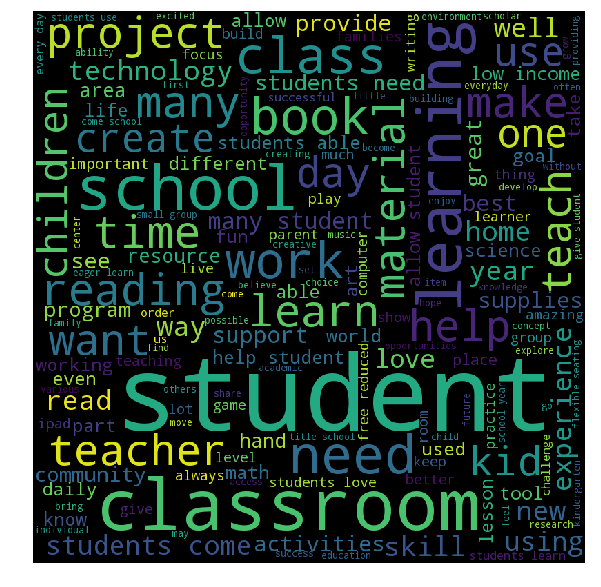

In [105]:

comment_words = ' '
# iterate through the csv file 
for i in range(len(false_positive_essays)): 
      
    # typecaste each val to string 
    val = false_positive_essays.iloc[i][0]
    val = str(val)
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

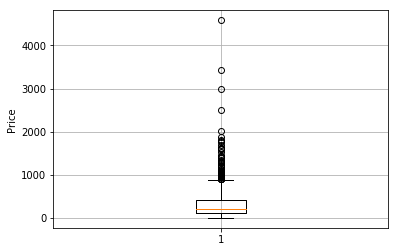

In [106]:
# Plot the box plot with the price of these false positive data points

price_false_positive = project_data_test.iloc[false_positive_indexes]['price']

plt.boxplot([price_false_positive])
plt.ylabel('Price')
plt.grid()
plt.show()

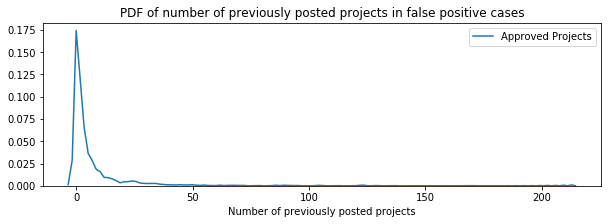

In [107]:
# Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points
plt.figure(figsize=(10,3))
sns.distplot(project_data_test.iloc[false_positive_indexes]['teacher_number_of_previously_posted_projects'], 
             hist=False, label="Approved Projects")
plt.title('PDF of number of previously posted projects in false positive cases')
plt.xlabel('Number of previously posted projects')
plt.show()

In [100]:
del model_avgw2v,dt_best_model_avgw2v,train_data_avgw2v,test_data_avgw2v

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [108]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation

# vectorizing the essays and titles using TFIDF W2V

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))



tfidf_w2v_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles_test.append(vector)

print(len(tfidf_w2v_titles_test))
print(len(tfidf_w2v_titles_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:29<00:00, 504.23it/s]


15000
300


100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 28054.58it/s]


15000
300


In [109]:
# concatenating the vectors to prepare train, test and validation sets for avg w2v

X = hstack((previous_projects_standardized, teacher_prefix_one_hot,school_state_one_hot,project_grade_one_hot,
                 categories_one_hot,sub_categories_one_hot,tfidf_w2v_titles,tfidf_w2v_vectors, price_standardized))

train_data_tfidf_w2v = X.todense()


X = hstack((previous_projects_standardized_test, teacher_prefix_one_hot_test,school_state_test_one_hot,
            project_grade_one_hot_test, categories_test_one_hot,sub_categories_test_one_hot, tfidf_w2v_titles_test,
            tfidf_w2v_vectors_test,price_standardized_test))

test_data_tfidf_w2v = X.todense()

del X

In [110]:
depth_vals = [1, 5, 10, 50, 100, 500, 1000]
min_samples_vals = [5, 10, 100, 500]

hyperparams = dict(max_depth=depth_vals, min_samples_split=min_samples_vals)

#Using randomsearchCV
model_tfidf_w2v = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=hyperparams, scoring = 'roc_auc', cv=4)
model_tfidf_w2v.fit(train_data_tfidf_w2v, train_class_labels)

model_cv_results = pd.DataFrame(model_tfidf_w2v.cv_results_)
model_cv_results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'param_min_samples_split',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [111]:
# sorting the results based on validation auc score

model_cv_results = model_cv_results.sort_values('mean_test_score',ascending=False)
[model_rows,model_cols] = model_cv_results.shape
x_axis = [i for i in range(model_rows)]

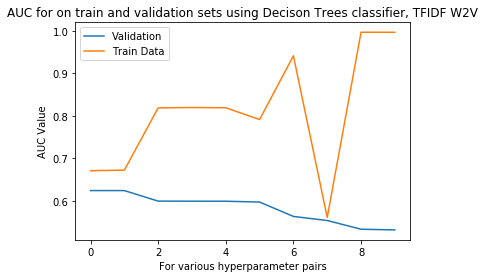

In [112]:
# plotting the line 1 points  
plt.plot(x_axis, model_cv_results['mean_test_score'], label = "Validation") 
  

# plotting the line 2 points  
plt.plot(x_axis, model_cv_results['mean_train_score'], label = "Train Data") 
  
# naming the x axis 
plt.xlabel('For various hyperparameter pairs') 
# naming the y axis 
plt.ylabel('AUC Value') 
# giving a title to my graph 
plt.title('AUC for on train and validation sets using Decison Trees classifier, TFIDF W2V') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 


In [113]:
best_depth_tfidf_w2v = model_cv_results.iloc[0]['param_max_depth']
best_split_tfidf_w2v = model_cv_results.iloc[0]['param_min_samples_split']

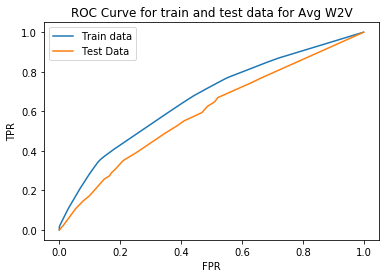

In [114]:
dt_best_model_tfidf_w2v = DecisionTreeClassifier(max_depth=best_depth_tfidf_w2v,min_samples_split=best_split_tfidf_w2v, 
                                             class_weight='balanced')
dt_best_model_tfidf_w2v.fit(train_data_tfidf_w2v,train_class_labels)
    
# predict labels of test data
pred_labels_test = dt_best_model_tfidf_w2v.predict_proba(test_data_tfidf_w2v)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = dt_best_model_tfidf_w2v.predict_proba(train_data_tfidf_w2v)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_tfidf_w2v = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for Avg W2V') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

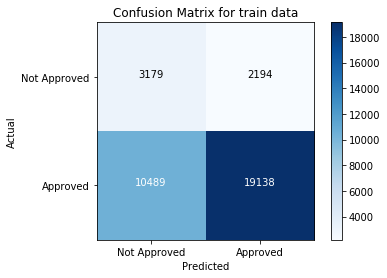

In [115]:
pred_labels_train = dt_best_model_tfidf_w2v.predict(train_data_tfidf_w2v)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

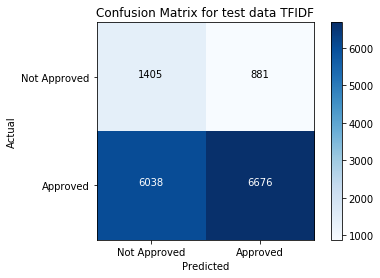

In [116]:
pred_labels_test = dt_best_model_tfidf_w2v.predict(test_data_tfidf_w2v)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data TFIDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [117]:
pred_indexes_positive = np.where(pred_labels_test==1)
actual_indexes_positive = np.where(actual_labels_test==0)
false_positive_indexes = (np.intersect1d(pred_indexes_positive,actual_indexes_positive))

preprocessed_essays_test_DF = pd.DataFrame(preprocessed_essays_test)
false_positive_essays = preprocessed_essays_test_DF.iloc[false_positive_indexes]


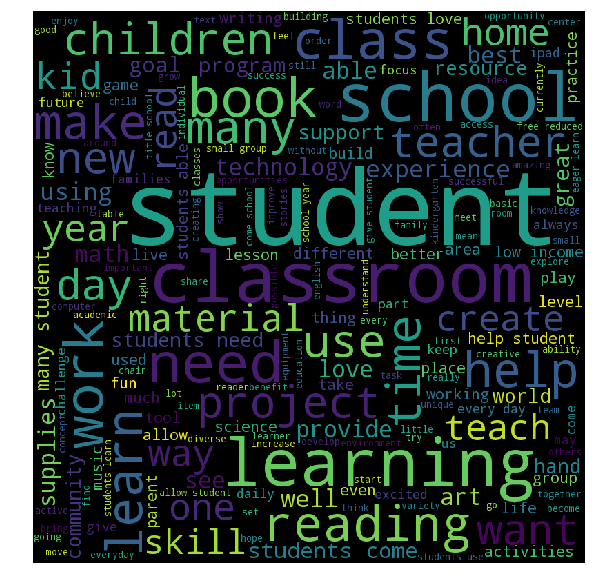

In [118]:

comment_words = ' '
# iterate through the csv file 
for i in range(len(false_positive_essays)): 
      
    # typecaste each val to string 
    val = false_positive_essays.iloc[i][0]
    val = str(val)
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

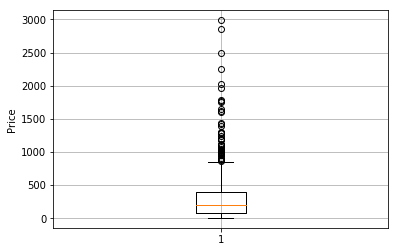

In [119]:
# Plot the box plot with the price of these false positive data points

price_false_positive = project_data_test.iloc[false_positive_indexes]['price']

plt.boxplot([price_false_positive])
plt.ylabel('Price')
plt.grid()
plt.show()

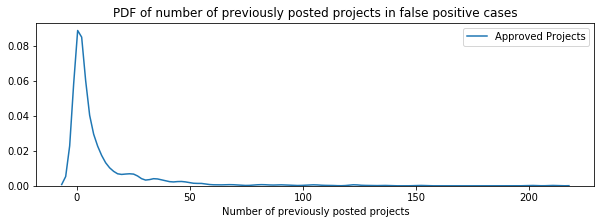

In [120]:
# Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points
plt.figure(figsize=(10,3))
sns.distplot(project_data_test.iloc[false_positive_indexes]['teacher_number_of_previously_posted_projects'], 
             hist=False, label="Approved Projects")
plt.title('PDF of number of previously posted projects in false positive cases')
plt.xlabel('Number of previously posted projects')
plt.show()

In [114]:
del model_tfidf_w2v,dt_best_model_tfidf_w2v,train_data_tfidf_w2v,test_data_tfidf_w2v

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [121]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# concatenating the vectors to prepare train, test and validation sets

X = hstack((previous_projects_standardized, teacher_prefix_one_hot,school_state_one_hot,project_grade_one_hot,
                 categories_one_hot,sub_categories_one_hot,title_tfidf, text_tfidf,price_standardized))

train_data_tfidf = X.todense()


X = hstack((previous_projects_standardized_test, teacher_prefix_one_hot_test,school_state_test_one_hot,
            project_grade_one_hot_test, categories_test_one_hot,sub_categories_test_one_hot,
            title_tfidf_test, text_tfidf_test,price_standardized_test))
train_class_labels
test_data_tfidf = X.todense()

In [122]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
model_tfidf = DecisionTreeClassifier()
model_tfidf.fit(train_data_tfidf,train_class_labels)
importances = model_tfidf.feature_importances_
sorted_feature_ids = np.argsort(importances)
selected_ids = np.argpartition(sorted_feature_ids, -5000)[-5000:]

In [123]:
trimmed_train = train_data_tfidf[:,selected_ids]
trimmed_test = test_data_tfidf[:,selected_ids]

In [124]:
depth_vals = [1, 5, 10, 50, 100, 500, 1000]
min_samples_vals = [5, 10, 100, 500]

hyperparams = dict(max_depth=depth_vals, min_samples_split=min_samples_vals)

#Using randomsearchCV
model_tfidf = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=hyperparams, scoring = 'roc_auc', cv=4)
model_tfidf.fit(trimmed_train, train_class_labels)


model_cv_results = pd.DataFrame(model_tfidf.cv_results_)
model_cv_results.columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'param_min_samples_split',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [125]:
# sorting the results based on validation auc score

model_cv_results = model_cv_results.sort_values('mean_test_score',ascending=False)
[model_rows,model_cols] = model_cv_results.shape
x_axis = [i for i in range(model_rows)]

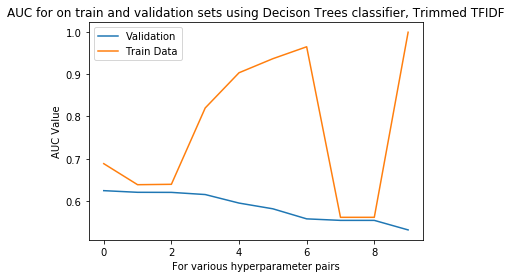

In [126]:

# plotting the line 1 points  
plt.plot(x_axis, model_cv_results['mean_test_score'], label = "Validation") 
  

# plotting the line 2 points  
plt.plot(x_axis, model_cv_results['mean_train_score'], label = "Train Data") 
  
# naming the x axis 
plt.xlabel('For various hyperparameter pairs') 
# naming the y axis 
plt.ylabel('AUC Value') 
# giving a title to my graph 
plt.title('AUC for on train and validation sets using Decison Trees classifier, Trimmed TFIDF') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 


In [127]:
best_depth_trim_tfidf = model_cv_results.iloc[0]['param_max_depth']
best_split_trim_tfidf = model_cv_results.iloc[0]['param_min_samples_split']

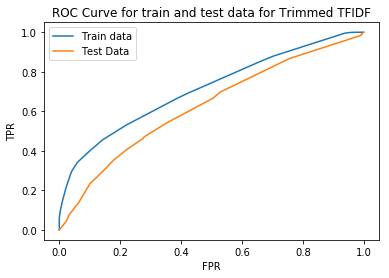

In [128]:
dt_best_model_trim_tfidf = DecisionTreeClassifier(max_depth=best_depth_trim_tfidf,min_samples_split=best_split_trim_tfidf, 
                                             class_weight='balanced')
dt_best_model_trim_tfidf.fit(trimmed_train,train_class_labels)
    
# predict labels of test data
pred_labels_test = dt_best_model_trim_tfidf.predict_proba(trimmed_test)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = dt_best_model_trim_tfidf.predict_proba(trimmed_train)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_trim_tfidf = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for Trimmed TFIDF') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

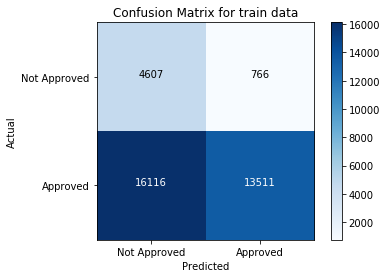

In [129]:
pred_labels_train = dt_best_model_trim_tfidf.predict(trimmed_train)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

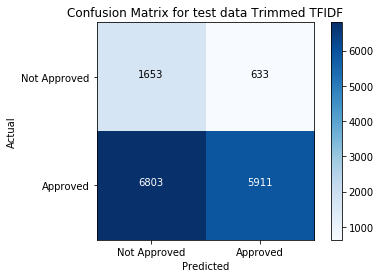

In [130]:
pred_labels_test = dt_best_model_trim_tfidf.predict(trimmed_test)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data Trimmed TFIDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [131]:
pred_indexes_positive = np.where(pred_labels_test==1)
actual_indexes_positive = np.where(actual_labels_test==0)
false_positive_indexes = (np.intersect1d(pred_indexes_positive,actual_indexes_positive))

preprocessed_essays_test_DF = pd.DataFrame(preprocessed_essays_test)
false_positive_essays = preprocessed_essays_test_DF.iloc[false_positive_indexes]


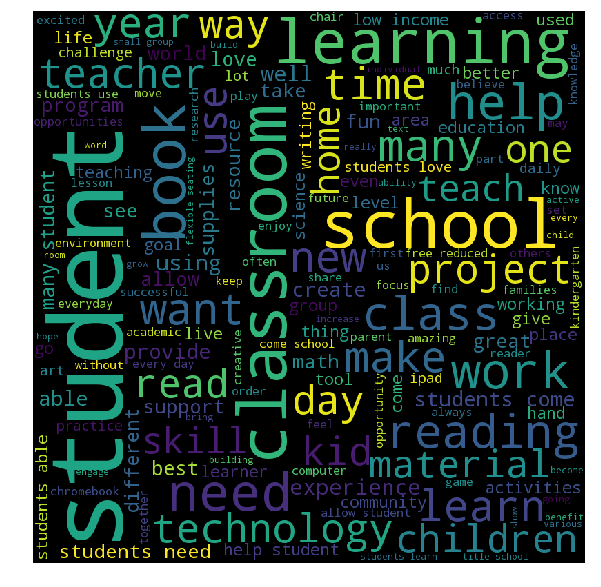

In [132]:

comment_words = ' '
# iterate through the csv file 
for i in range(len(false_positive_essays)): 
      
    # typecaste each val to string 
    val = false_positive_essays.iloc[i][0]
    val = str(val)
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

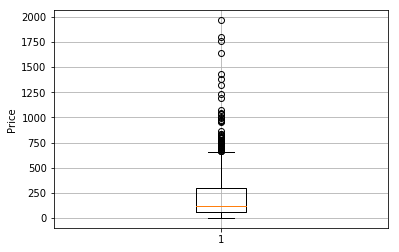

In [133]:
# Plot the box plot with the price of these false positive data points

price_false_positive = project_data_test.iloc[false_positive_indexes]['price']

plt.boxplot([price_false_positive])
plt.ylabel('Price')
plt.grid()
plt.show()

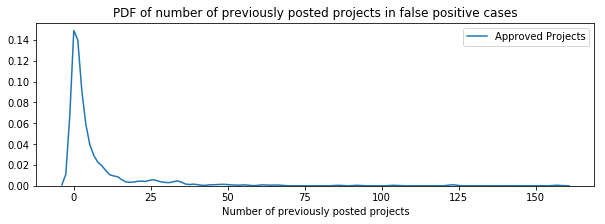

In [134]:
# Plot the pdf with the teacher_number_of_previously_posted_projects of these false positive data points
plt.figure(figsize=(10,3))
sns.distplot(project_data_test.iloc[false_positive_indexes]['teacher_number_of_previously_posted_projects'], 
             hist=False, label="Approved Projects")
plt.title('PDF of number of previously posted projects in false positive cases')
plt.xlabel('Number of previously posted projects')
plt.show()

<h1>3. Conclusion</h1>

In [135]:
# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer Name', 'Best Depth','Best Split','AUC Score'])
t.add_row(['BOW', best_depth_bow, best_split_bow, auc_bow])
t.add_row(['Tf-Idf', best_depth_tfidf, best_split_tfidf, auc_tfidf])
t.add_row(['W2V', best_depth_avgw2v,best_split_avgw2v,auc_avgw2v])
t.add_row(['Tf-Idf W2V', best_depth_tfidf_w2v, best_split_tfidf_w2v,auc_tfidf_w2v])
t.add_row(['Tf-Idf Extracted', best_depth_trim_tfidf,best_split_trim_tfidf,auc_trim_tfidf])
print(t)

+------------------+------------+------------+--------------------+
| Vectorizer Name  | Best Depth | Best Split |     AUC Score      |
+------------------+------------+------------+--------------------+
|       BOW        |     10     |    500     | 0.6461114159534526 |
|      Tf-Idf      |     10     |    500     | 0.6413376571400338 |
|       W2V        |     10     |     10     | 0.5778741093339421 |
|    Tf-Idf W2V    |     5      |    500     | 0.5949644965332613 |
| Tf-Idf Extracted |     10     |     5      | 0.6250659402197976 |
+------------------+------------+------------+--------------------+
